In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [8]:
# Create data

df = pd.DataFrame(
    [
        ['v2.8.0 (threaded) on 1/16 node [reference]', 1.0 / 16.0, 'area_statistics', '0:01:22.751035'],
        ['v2.8.0 (threaded) on 1/16 node [reference]', 1.0 / 16.0, 'climate_statistics', '0:00:53.552112'],
        ['v2.8.0 (threaded) on 1/16 node [reference]', 1.0 / 16.0, 'regrid', '0:00:54.988726'],
        ['v2.8.0 (threaded) on 1/16 node [reference]', 1.0 / 16.0, 'extract_levels', '0:29:09.263521'],
        ['v2.8.0 (threaded) on 1/16 node [reference]', 1.0 / 16.0, 'amplitude', '0:00:58.242961'],
        ['v2.8.0 (threaded) on 1 node', 1.0, 'area_statistics', '0:01:13.376243'],
        ['v2.8.0 (threaded) on 1 node', 1.0, 'climate_statistics', '0:00:53.622866'],
        ['v2.8.0 (threaded) on 1 node', 1.0, 'regrid', '0:00:54.278396'],
        ['v2.8.0 (threaded) on 1 node', 1.0, 'extract_levels', '0:27:08.828873'],
        ['v2.8.0 (threaded) on 1 node', 1.0, 'amplitude', '0:00:57.498253'],
        ['v2.11.0 (threaded) on 1 node', 1.0, 'area_statistics', '0:01:20.836670'],
        ['v2.11.0 (threaded) on 1 node', 1.0, 'climate_statistics', '0:00:55.943814'],
        ['v2.11.0 (threaded) on 1 node', 1.0, 'regrid', '0:00:55.298930'],
        ['v2.11.0 (threaded) on 1 node', 1.0, 'extract_levels', '0:18:04.154189'],
        ['v2.11.0 (threaded) on 1 node', 1.0, 'amplitude', '0:01:11.498759'],
        ['v2.11.0 (distributed) on 1/16 node', 1.0 / 16.0, 'area_statistics', '0:00:57.855687'],
        ['v2.11.0 (distributed) on 1/16 node', 1.0 / 16.0, 'climate_statistics', '0:00:43.659131'],
        ['v2.11.0 (distributed) on 1/16 node', 1.0 / 16.0, 'regrid', '0:00:42.570228'],
        ['v2.11.0 (distributed) on 1/16 node', 1.0 / 16.0, 'extract_levels', '0:05:57.377435'],
        ['v2.11.0 (distributed) on 1/16 node', 1.0 / 16.0, 'amplitude', '0:00:49.265069'],
        ['v2.11.0 (distributed) on 1 node', 1.0, 'area_statistics', '0:00:42.440049'],
        ['v2.11.0 (distributed) on 1 node', 1.0, 'climate_statistics', '0:00:31.355229'],
        ['v2.11.0 (distributed) on 1 node', 1.0, 'regrid', '0:00:30.411452'],
        ['v2.11.0 (distributed) on 1 node', 1.0, 'extract_levels', '0:01:21.215876'],
        ['v2.11.0 (distributed) on 1 node', 1.0, 'amplitude', '0:00:30.716969'],
    ],
    columns=['setup', 'n_nodes', 'preprocessor', 'clocktime'],
)
df['clocktime'] = pd.to_timedelta(df['clocktime'])
df['runtime'] = df['clocktime'].dt.total_seconds()
ref_setup = 'v2.8.0 (threaded) on 1/16 node [reference]'
for preprocessor in df['preprocessor'].unique():
    idx = df['preprocessor'] == preprocessor
    ref_idx = (df['setup'] == ref_setup) & idx
    ref_runtime = df.loc[ref_idx, 'runtime'].values.squeeze()
    ref_n_nodes = df.loc[ref_idx, 'n_nodes'].values.squeeze()
    df.loc[idx, 'speedup'] = ref_runtime / df.loc[idx, 'runtime']
    df.loc[idx, 'efficiency'] = df.loc[idx, 'speedup'] / df.loc[idx, 'n_nodes'] * ref_n_nodes
df

,setup,n_nodes,preprocessor,clocktime,runtime,speedup,efficiency
0,v2.8.0 (threaded) on 1/16 node [reference],0.0625,area_statistics,0 days 00:01:22.751035,82.751035,1.000000,1.000000
1,v2.8.0 (threaded) on 1/16 node [reference],0.0625,climate_statistics,0 days 00:00:53.552112,53.552112,1.000000,1.000000
2,v2.8.0 (threaded) on 1/16 node [reference],0.0625,regrid,0 days 00:00:54.988726,54.988726,1.000000,1.000000
3,v2.8.0 (threaded) on 1/16 node [reference],0.0625,extract_levels,0 days 00:29:09.263521,1749.263521,1.000000,1.000000
4,v2.8.0 (threaded) on 1/16 node [reference],0.0625,amplitude,0 days 00:00:58.242961,58.242961,1.000000,1.000000
5,v2.8.0 (threaded) on 1 node,1.0000,area_statistics,0 days 00:01:13.376243,73.376243,1.127763,0.070485
6,v2.8.0 (threaded) on 1 node,1.0000,climate_statistics,0 days 00:00:53.622866,53.622866,0.998681,0.062418
7,v2.8.0 (threaded) on 1 node,1.0000,regrid,0 days 00:00:54.278396,54.278396,1.013087,0.063318
8,v2.8.0 (threaded) on 1 node,1.0000,extract_levels,0 days 00:27:08.828873,1628.828873,1.073939,0.067121
9,v2.8.0 (threaded) on 1 node,1.0000,amplitude,0 days 00:00:57.498253,57.498253,1.012952,0.063309


In [9]:
PALETTE = [
    'lightcoral',
    'firebrick',
    'darkorange',
    'lightsteelblue',
    'royalblue',
]

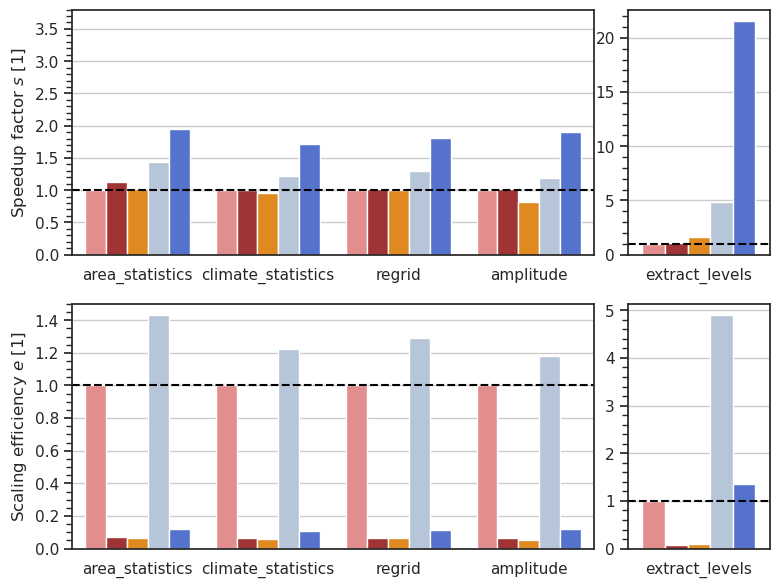

In [13]:
# Create plot
sns.set_theme(
    style='ticks',
    rc={
        'axes.grid': True,
        'xtick.bottom': False,
        'ytick.minor.visible': True,
    },
)

fig = plt.figure(figsize=(9, 7))
gs = GridSpec(2, 24, figure=fig)

df1 = df[df['preprocessor'] != 'extract_levels']
df2 = df[df['preprocessor'] == 'extract_levels']

ax_top_left = fig.add_subplot(gs[0, 0:18])
ax_top_right = fig.add_subplot(gs[0, 19:24])
ax_bottom_left = fig.add_subplot(gs[1, 0:18], sharex=ax_top_left)
ax_bottom_right = fig.add_subplot(gs[1, 19:24], sharex=ax_top_right)

sns.barplot(df1, x='preprocessor', y='speedup', hue='setup', legend=False, palette=PALETTE, ax=ax_top_left)
sns.barplot(df2, x='preprocessor', y='speedup', hue='setup', legend=False, palette=PALETTE, ax=ax_top_right)
sns.barplot(df1, x='preprocessor', y='efficiency', hue='setup', legend=False, palette=PALETTE, ax=ax_bottom_left)
sns.barplot(df2, x='preprocessor', y='efficiency', hue='setup', legend=False, palette=PALETTE, ax=ax_bottom_right)

ax_top_left.set_ylabel('Speedup factor $s$ [1]')
ax_top_left.set_ylim(0.0, 3.8)
ax_bottom_left.set_ylabel('Scaling efficiency $e$ [1]')
ax_top_right.set_ylabel(None)
ax_bottom_right.set_ylabel(None)

for ax in fig.axes:
    ax.set_xlabel(None)
    ax.axhline(1.0, color='black', linestyle='dashed')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='y', which='minor', left=True)
    # ax.label_outer()

plt.savefig(
    'single_preprocessors.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight',
)

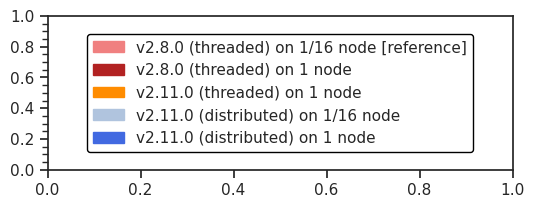

In [11]:
# legend
sns.set_theme(
    style='ticks',
    rc={
        'axes.grid': False,
        'figure.figsize':(5, 5),
    },
)

plt.figure(figsize=(6, 2))

patches = [
    mpatches.Patch(color=PALETTE[0], label='v2.8.0 (threaded) on 1/16 node [reference]'),
    mpatches.Patch(color=PALETTE[1], label='v2.8.0 (threaded) on 1 node'),
    mpatches.Patch(color=PALETTE[2], label='v2.11.0 (threaded) on 1 node'),
    mpatches.Patch(color=PALETTE[3], label='v2.11.0 (distributed) on 1/16 node'),
    mpatches.Patch(color=PALETTE[4], label='v2.11.0 (distributed) on 1 node'),
]
legend = plt.legend(handles=patches, loc='center', edgecolor="black")
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.0))

plt.savefig(
    'legend.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)